# Import packages

In [1]:
import pandas as pd
import ast
from geopy.distance import geodesic
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split
import ml_help
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plot_label="Volume"
GARDINER_LOCS_MIDDLE_POINT = (43.638933, -79.457196)

In [2]:
inci_df = pd.read_csv("../analysis/050_incidents/050_incidents.csv.zip")
inci_df["collectedAt"] = pd.to_datetime(inci_df["collectedAt"], utc=True)
inci_df["collectedAt"] = inci_df["collectedAt"].dt.floor(freq="s")
inci_df.head()

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Rename close_to_gardiner_detector for future merge with count dataframe

In [3]:
inci_df.rename({"close_to_gardiner_detector": "detector_id"},inplace=True,axis=1)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,detector_id
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


In [4]:
inci_df["events"] = inci_df["events"].apply(lambda x: ast.literal_eval(x))
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,detector_id
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Break events in one new row per event

In [5]:
inci_df = inci_df.explode("events").reset_index()
inci_df.drop("index", axis=1, inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,detector_id
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- I don't need "from" and "to" because I have already flagged each incident as being close to either Yonge and/or Gardiner

In [6]:
inci_df.drop(columns=["from","to"],inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,close_to_yonge_detector,detector_id
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Getting event description from "events"

In [7]:
inci_df["event_description"] = inci_df["events"].apply(lambda x: x['description'])
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,close_to_yonge_detector,detector_id,event_description
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Dropping "iconCategory" and "events" in favour of more detailed "event_description"

In [8]:
inci_df.drop(["iconCategory", "events"], axis=1, inplace=True)
inci_df

,magnitudeOfDelay,length,delay,collectedAt,close_to_yonge_detector,detector_id,event_description
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,0.0,273.828235,0.0,2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,0.0,254.244867,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...
40632,1.0,442.750186,165.0,2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,1.0,2461.341117,127.0,2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,1.0,472.289662,158.0,2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Load Gardiner count data set

In [9]:
count_df = pd.read_csv("../../csv/v2/040_gardiner_count_processed.csv.zip")
count_df["datetime_bin"] = pd.to_datetime(count_df["datetime_bin"], utc=True)
count_df.rename({"datetime_bin": "collectedAt"},inplace=True,axis=1)
count_df

,datetime_bin,volume_15min,number_of_lanes,direction,month,day,day_of_week,hour,minute,dist_from_mid_point
0,2022-08-11 15:00:00+00:00,160,3,W,August,11,Thursday,15,0,4.887837
1,2022-08-11 15:00:00+00:00,170,3,E,August,11,Thursday,15,0,0.474912
2,2022-08-11 15:00:00+00:00,169,3,E,August,11,Thursday,15,0,-0.635254
3,2022-08-11 15:00:00+00:00,123,3,W,August,11,Thursday,15,0,-0.633557
4,2022-08-11 15:00:00+00:00,134,3,W,August,11,Thursday,15,0,-7.665465
...,...,...,...,...,...,...,...,...,...,...
145094,2023-01-01 05:15:00+00:00,98,3,E,January,1,Sunday,5,15,-7.668009
145095,2023-01-01 05:15:00+00:00,439,3,W,January,1,Sunday,5,15,0.474912
145096,2023-01-01 05:15:00+00:00,243,3,E,January,1,Sunday,5,15,0.474912
145097,2023-01-01 05:15:00+00:00,365,5,W,January,1,Sunday,5,15,-1.750579


- Add distance to middle point to count data set

In [10]:
def calculate_distance(coord):
    if GARDINER_LOCS_MIDDLE_POINT[1] > coord[1]:
        return -geodesic(GARDINER_LOCS_MIDDLE_POINT,coord).km
    return geodesic(GARDINER_LOCS_MIDDLE_POINT,coord).km

count_df["dist_from_mid_point"] = count_df.progress_apply(lambda x: calculate_distance((x["latitude"],x["longitude"])),axis=1)
count_df.head()

100%|███████████████████████████| 145099/145099 [00:23<00:00, 6293.22it/s]


,detector_id,collectedAt,volume_15min,number_of_lanes,primary_road,direction,latitude,longitude,detector_loc,dist_from_mid_point
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,F G Gardiner Xy W,W,43.638046,-79.396634,W of SPADINA AV,4.887837
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,F G Gardiner Xy E,E,43.638420,-79.451353,W of RONCESVALLES AVE,0.474912
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,F G Gardiner Xy E,E,43.637296,-79.464739,E of ELLIS AVE,-0.635254
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,F G Gardiner Xy W,W,43.637449,-79.464777,E of ELLIS AVE,-0.633557
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,F G Gardiner Xy W,W,43.614486,-79.546012,At THE EAST MALL,-7.665465


- Drop unused columns

In [11]:
count_df.drop(["detector_loc", "primary_road", "latitude", "longitude"],inplace=True,axis=1)
count_df

,detector_id,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,W,4.887837
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,E,0.474912
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,E,-0.635254
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,W,-0.633557
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,W,-7.665465
...,...,...,...,...,...,...
145094,DW0201DEG,2023-01-01 05:15:00+00:00,98,3,E,-7.668009
145095,DW0126DWG,2023-01-01 05:15:00+00:00,439,3,W,0.474912
145096,DW0126DEG,2023-01-01 05:15:00+00:00,243,3,E,0.474912
145097,DW0151DWG,2023-01-01 05:15:00+00:00,365,5,W,-1.750579


- Merge incidents and data set with location and distance

In [12]:
count_inci_df = pd.merge(count_df, inci_df, on=["collectedAt", "detector_id"], how="left")
count_inci_df

,detector_id,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,close_to_yonge_detector,event_description
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,W,4.887837,NaN,NaN,NaN,NaN,NaN
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,E,0.474912,NaN,NaN,NaN,NaN,NaN
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,NaN,NaN,NaN,NaN,NaN
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,NaN,NaN,NaN,NaN,NaN
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
145236,DW0201DEG,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,NaN,NaN,NaN,NaN,NaN
145237,DW0126DWG,2023-01-01 05:15:00+00:00,439,3,W,0.474912,NaN,NaN,NaN,NaN,NaN
145238,DW0126DEG,2023-01-01 05:15:00+00:00,243,3,E,0.474912,NaN,NaN,NaN,NaN,NaN
145239,DW0151DWG,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,NaN,NaN,NaN,NaN,NaN


- Drop close_to_yonge_detector because I am working with Gardiner locations

In [13]:
count_inci_df.drop("close_to_yonge_detector",inplace=True,axis=1)
count_inci_df

,detector_id,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,W,4.887837,NaN,NaN,NaN,NaN
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,E,0.474912,NaN,NaN,NaN,NaN
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,NaN,NaN,NaN,NaN
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,NaN,NaN,NaN,NaN
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
145236,DW0201DEG,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,NaN,NaN,NaN,NaN
145237,DW0126DWG,2023-01-01 05:15:00+00:00,439,3,W,0.474912,NaN,NaN,NaN,NaN
145238,DW0126DEG,2023-01-01 05:15:00+00:00,243,3,E,0.474912,NaN,NaN,NaN,NaN
145239,DW0151DWG,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,NaN,NaN,NaN,NaN


- Fill missing values

In [14]:
count_inci_df["magnitudeOfDelay"].fillna(0,inplace=True)
count_inci_df["length"].fillna(0,inplace=True)
count_inci_df["delay"].fillna(0,inplace=True)
count_inci_df["event_description"].fillna("No incidents",inplace=True)
count_inci_df

,detector_id,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,W,4.887837,0.0,0.0,0.0,No incidents
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,E,0.474912,0.0,0.0,0.0,No incidents
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,0.0,0.0,0.0,No incidents
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,0.0,0.0,0.0,No incidents
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,0.0,0.0,0.0,No incidents
...,...,...,...,...,...,...,...,...,...,...
145236,DW0201DEG,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,0.0,0.0,0.0,No incidents
145237,DW0126DWG,2023-01-01 05:15:00+00:00,439,3,W,0.474912,0.0,0.0,0.0,No incidents
145238,DW0126DEG,2023-01-01 05:15:00+00:00,243,3,E,0.474912,0.0,0.0,0.0,No incidents
145239,DW0151DWG,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,0.0,0.0,0.0,No incidents


- Drop detector_id column because it will not be used anymore

In [15]:
count_inci_df.drop("detector_id",inplace=True,axis=1)
count_inci_df["dist_from_mid_point"].fillna(-1,inplace=True)
count_inci_df

,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description
0,2022-08-11 15:00:00+00:00,160,3,W,4.887837,0.0,0.0,0.0,No incidents
1,2022-08-11 15:00:00+00:00,170,3,E,0.474912,0.0,0.0,0.0,No incidents
2,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,0.0,0.0,0.0,No incidents
3,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,0.0,0.0,0.0,No incidents
4,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,0.0,0.0,0.0,No incidents
...,...,...,...,...,...,...,...,...,...
145236,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,0.0,0.0,0.0,No incidents
145237,2023-01-01 05:15:00+00:00,439,3,W,0.474912,0.0,0.0,0.0,No incidents
145238,2023-01-01 05:15:00+00:00,243,3,E,0.474912,0.0,0.0,0.0,No incidents
145239,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,0.0,0.0,0.0,No incidents


- Convert collectedAt to datetime

In [16]:
count_inci_df["collectedAt"] = pd.to_datetime(count_inci_df["collectedAt"],utc=True)

- Expand collectedAt

In [17]:
count_inci_df["month"] = count_inci_df.collectedAt.dt.month
count_inci_df["day_of_week"] = count_inci_df.collectedAt.dt.weekday
count_inci_df["hour"] = count_inci_df.collectedAt.dt.hour
count_inci_df["minute"] = count_inci_df.collectedAt.dt.minute
count_inci_df.drop("collectedAt",inplace=True,axis=1)
count_inci_df

,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description,month,day,day_of_week,hour,minute
0,160,3,W,4.887837,0.0,0.0,0.0,No incidents,8,11,3,15,0
1,170,3,E,0.474912,0.0,0.0,0.0,No incidents,8,11,3,15,0
2,169,3,E,-0.635254,0.0,0.0,0.0,No incidents,8,11,3,15,0
3,123,3,W,-0.633557,0.0,0.0,0.0,No incidents,8,11,3,15,0
4,134,3,W,-7.665465,0.0,0.0,0.0,No incidents,8,11,3,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,98,3,E,-7.668009,0.0,0.0,0.0,No incidents,1,1,6,5,15
145237,439,3,W,0.474912,0.0,0.0,0.0,No incidents,1,1,6,5,15
145238,243,3,E,0.474912,0.0,0.0,0.0,No incidents,1,1,6,5,15
145239,365,5,W,-1.750579,0.0,0.0,0.0,No incidents,1,1,6,5,15


# Plot correlations
- Between speed, day of week, hour, magnitude of delay, length, delay

- Break collectedAt into needed fields

In [18]:
data_to_correlate = count_inci_df[["volume_15min","day_of_week","hour","number_of_lanes","dist_from_mid_point","magnitudeOfDelay","length","delay"]]
corr_mat = data_to_correlate.corr()

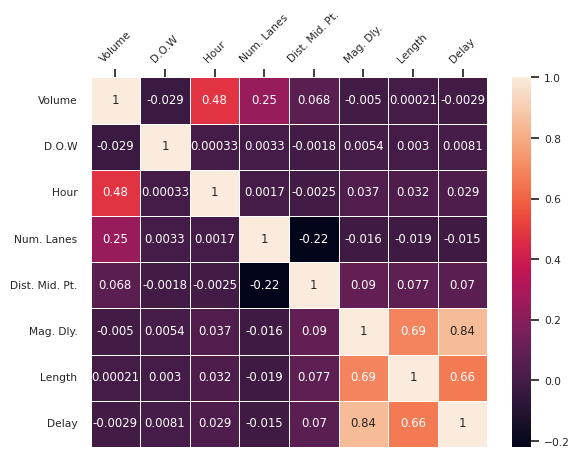

In [23]:
labels=["Volume", "D.O.W", "Hour", "Num. Lanes", "Dist. Mid. Pt.", "Mag. Dly.", "Length", "Delay"]

sns.set(font_scale=0.7)
ax = sns.heatmap(corr_mat,annot=True,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/090_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/090_correlations.png", bbox_inches="tight")

# Onehot encode categorical attributes
- Also cast all fields to float32

In [25]:
categorical_attrs = ["direction","event_description", "month", "day_of_week"]

transformed_df = pd.get_dummies(count_inci_df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df

,volume_15min,number_of_lanes,dist_from_mid_point,magnitudeOfDelay,length,delay,day,hour,minute,direction_E,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,160.0,3.0,4.887837,0.0,0.0,0.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,170.0,3.0,0.474912,0.0,0.0,0.0,11.0,15.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,169.0,3.0,-0.635254,0.0,0.0,0.0,11.0,15.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,123.0,3.0,-0.633557,0.0,0.0,0.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,134.0,3.0,-7.665465,0.0,0.0,0.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,98.0,3.0,-7.668009,0.0,0.0,0.0,1.0,5.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145237,439.0,3.0,0.474912,0.0,0.0,0.0,1.0,5.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145238,243.0,3.0,0.474912,0.0,0.0,0.0,1.0,5.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145239,365.0,5.0,-1.750579,0.0,0.0,0.0,1.0,5.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
transformed_df.to_csv("./data/gardiner_count_incidents.csv.zip", index=False, compression="zip")